In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('kc_house_data[1].csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df['waterfront']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [10]:
df['waterfront'].value_counts()

waterfront
0.0    19075
1.0      146
Name: count, dtype: int64

In [11]:
df['waterfront'].isna().sum()

2376

In [12]:
df['waterfront'].fillna(0.0,inplace=True)
df['waterfront'].isna().sum()

0

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df.drop(columns=['yr_renovated'],inplace=True)
df.drop(columns=['view'],inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df['grade'].value_counts()

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [17]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [18]:
date_df=pd.to_datetime(df['date'])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [19]:
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

dataframe has 21597 entries with waterfront,view and yr_renovated having null entries
df range int64,float64 require further analysis


In [20]:
df.duplicated().sum()

0

In [21]:
def extreme_values(df):
    for col in df.columns:
        print(col,'\n',df[col].value_counts(normalize=True),'\n')
extreme_values(df)

id 
 id
795000620     0.000139
8910500150    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
                ...   
3649100387    0.000046
2767603649    0.000046
1446403617    0.000046
5602000275    0.000046
1523300157    0.000046
Name: proportion, Length: 21420, dtype: float64 

date 
 date
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
               ...   
11/2/2014    0.000046
1/31/2015    0.000046
5/24/2015    0.000046
5/17/2014    0.000046
7/27/2014    0.000046
Name: proportion, Length: 372, dtype: float64 

price 
 price
450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
278800.0    0.000046
439888.0    0.000046
354901.0    0.000046
942000.0    0.000046
402101.0    0.000046
Name: proportion, Length: 3622, dtype: float64 

bedrooms 
 bedrooms
3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.01259

## check for duplicates

In [22]:
df.duplicated().sum()

0

In [23]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [24]:
sold_more_than_once = len(df) - len(df['id'].value_counts())
sold_more_than_once

177

177 houses have been sold more than once in the period of one year from 2-5-2014 to 27-5-2015

In [28]:
df['sqft_basement'].value_counts()

sqft_basement
0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [25]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
(df['sqft_basement'].dtype)

dtype('float64')

<Axes: ylabel='sqft_basement'>

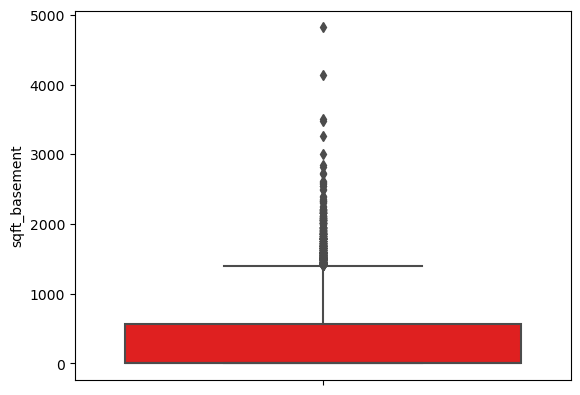

In [27]:
sns.boxplot(y=df['sqft_basement'], color='r')

In [29]:
df['has_basement'] =df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)
df['log_sqft_basement']=df['sqft_basement'].apply(lambda x: np.log1p(x))
give=[0,500,1000,1500,2000, np.inf]
labels=['No_basement','small','medium','large','very large']
df['basement_size_category'] = pd.cut(df['sqft_basement'], bins=give, labels=labels, right=False)
print(df[['sqft_basement', 'has_basement', 'log_sqft_basement', 'basement_size_category']].head())

   sqft_basement  has_basement  log_sqft_basement basement_size_category
0            0.0             0           0.000000            No_basement
1          400.0             1           5.993961            No_basement
2            0.0             0           0.000000            No_basement
3          910.0             1           6.814543                  small
4            0.0             0           0.000000            No_basement


In [30]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [31]:
df['bedrooms'].replace(33,3, inplace=True)
df['bedrooms'].value_counts()

bedrooms
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      21597 non-null  int64   
 1   date                    21597 non-null  object  
 2   price                   21597 non-null  float64 
 3   bedrooms                21597 non-null  int64   
 4   bathrooms               21597 non-null  float64 
 5   sqft_living             21597 non-null  int64   
 6   sqft_lot                21597 non-null  int64   
 7   floors                  21597 non-null  float64 
 8   waterfront              21597 non-null  float64 
 9   condition               21597 non-null  int64   
 10  grade                   21597 non-null  int64   
 11  sqft_above              21597 non-null  int64   
 12  sqft_basement           21143 non-null  float64 
 13  yr_built                21597 non-null  int64   
 14  zipcode               

In [34]:
categorical_columns = []
numerical_columns = []
for name in df.columns:
    if df[name].dtype == 'O':
        categorical_columns.append(name)
    else:
        numerical_columns.append(name)  
print(f'categorical_columns:', categorical_columns)
print(f'numerical_columns:', numerical_columns)
        

categorical_columns: ['date']
numerical_columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'has_basement', 'log_sqft_basement', 'basement_size_category']


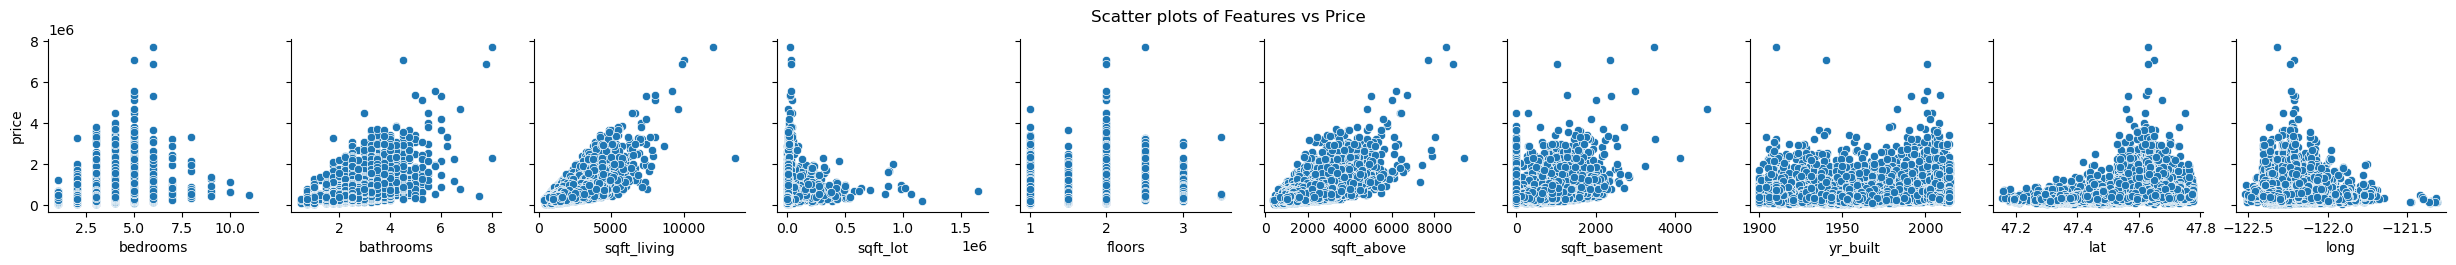

In [37]:
numerical_columns1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                      'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long']
df_subset  = df[numerical_columns1]
sns.pairplot(df_subset, y_vars=['price'], x_vars=numerical_columns1[1:])
plt.suptitle('Scatter plots of Features vs Price',y=1.02)
plt.show()


### interpretation:

1. Bedrooms
> The plot shows a wide range of prices for different numbers of bedrooms.
> There isn't a strong linear relationship between the number of bedrooms and price.  

2. Bathrooms  
> There seems to be a positive relationship, with more bathrooms generally associated with higher prices.  

3. Sqft living   
> There is a clear positive correlation between the square footage of living space and price, thus significant feature for predicting price 

4. Sqft Lot   
> The relationship is not as clear, this might be a less significant feature or require transformation for better modelling   

5. Floors   
> There is a slight positive trend, but the relationship not that strong   

6. sqft above  
> There is a positive correlation  

7. Sqft basement  
> There is a positive trend, it might add value to the model but shows more scatter compared to sqft living   

8. yr Built  
> The relationship is not very clear, prices do not increase consistently with the yr built.   

9. Lat and long  
> Both plots show some clustering, indicating geographic location influences price.  


Based on the plots sqft_living, sqft_above, bathrooms, and `sqft_basement show stronger relationships with price, although Latitude and longitude also seem important due to location effects.

In [38]:
df_subset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
price,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.605368,0.325008,0.053953,0.306692,0.022036
bedrooms,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,0.492549,0.309281,0.160748,-0.011612,0.136574
bathrooms,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.686668,0.282693,0.507173,0.024280,0.224903
sqft_living,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.876448,0.434576,0.318152,0.052155,0.241214
sqft_lot,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015533,0.052946,-0.085514,0.230227
floors,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.245144,0.489193,0.049239,0.125943
sqft_above,0.605368,0.492549,0.686668,0.876448,0.184139,0.523989,1.000000,-0.052293,0.424037,-0.001199,0.344842
sqft_basement,0.325008,0.309281,0.282693,0.434576,0.015533,-0.245144,-0.052293,1.000000,-0.132844,0.110637,-0.145174
yr_built,0.053953,0.160748,0.507173,0.318152,0.052946,0.489193,0.424037,-0.132844,1.000000,-0.148370,0.409993
lat,0.306692,-0.011612,0.024280,0.052155,-0.085514,0.049239,-0.001199,0.110637,-0.148370,1.000000,-0.135371


In [40]:
abs(df_subset.corr()) > 0.35

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long
price,True,False,True,True,False,False,True,False,False,False,False
bedrooms,False,True,True,True,False,False,True,False,False,False,False
bathrooms,True,True,True,True,False,True,True,False,True,False,False
sqft_living,True,True,True,True,False,True,True,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,True,True,False,True,True,False,True,False,False
sqft_above,True,True,True,True,False,True,True,False,True,False,False
sqft_basement,False,False,False,True,False,False,False,True,False,False,False
yr_built,False,False,True,False,False,True,True,False,True,False,True
lat,False,False,False,False,False,False,False,False,False,True,False


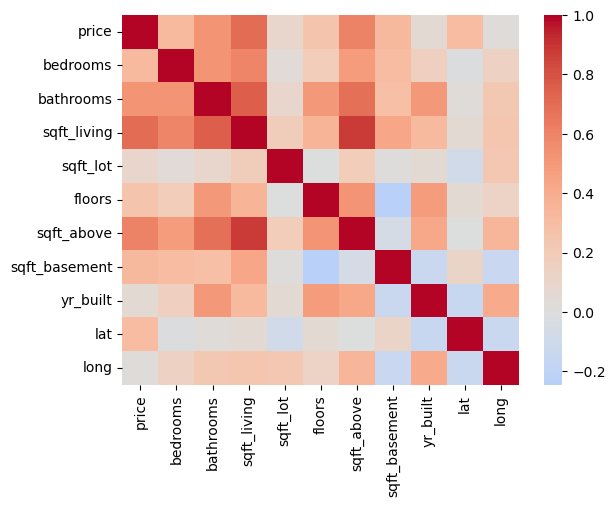

In [48]:
sns.heatmap(df_subset.corr(),cmap='coolwarm',center=0);